In [20]:
import pandas as pd
import numpy as np
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [7]:
train = pd.read_csv("train_ready_for_model.csv")

In [8]:
test = pd.read_csv("test_ready_for_model.csv")

In [12]:
result = test[["Outlet_Identifier","Item_Identifier"]]

In [14]:
result["Item_Outlet_Sales"] = train.Item_Outlet_Sales.mean()

/anaconda3/envs/seq2seq/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [16]:
result.to_csv("res1.csv",index=False)

In [17]:
#Define target and ID columns:
target = 'Item_Outlet_Sales'
IDcol = ['Item_Identifier','Outlet_Identifier']
from sklearn import cross_validation, metrics

def modelfit(alg, dtrain, dtest, predictors, target, IDcol, filename):
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target])
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])

    #Perform cross-validation:
    cv_score = cross_validation.cross_val_score(alg, dtrain[predictors], dtrain[target], cv=20, scoring='mean_squared_error')
    cv_score = np.sqrt(np.abs(cv_score))
    
    #Print model report:
    print("\nModel Report")
    print("RMSE : %.4g" % np.sqrt(metrics.mean_squared_error(dtrain[target].values, dtrain_predictions)))
    
    #Predict on testing data:
    dtest[target] = alg.predict(dtest[predictors])
    
    #Export submission file:
    IDcol.append(target)
    submission = pd.DataFrame({ x: dtest[x] for x in IDcol})
    submission.to_csv(filename, index=False)




/anaconda3/envs/seq2seq/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


predictors :  ['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_

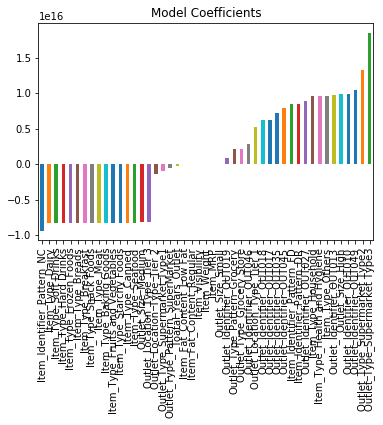

In [21]:
from sklearn.linear_model import LinearRegression
predictors = [x for x in train.columns if x not in [target]+IDcol]
print("predictors : ",predictors)
# print predictors
alg1 = LinearRegression(normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res2.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

predictors :  ['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_

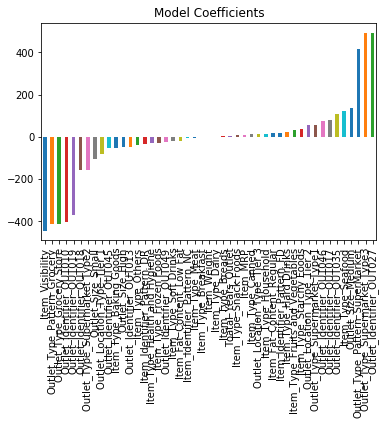

In [25]:
from sklearn.linear_model import Ridge
predictors = [x for x in train.columns if x not in [target]+IDcol]
print("predictors : ",predictors)
# print predictors
alg1 = Ridge(alpha = 0.5,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res3.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

predictors :  ['Item_Fat_Content_Low Fat', 'Item_Fat_Content_Regular', 'Item_Type_Baking Goods', 'Item_Type_Breads', 'Item_Type_Breakfast', 'Item_Type_Canned', 'Item_Type_Dairy', 'Item_Type_Frozen Foods', 'Item_Type_Fruits and Vegetables', 'Item_Type_Hard Drinks', 'Item_Type_Health and Hygiene', 'Item_Type_Household', 'Item_Type_Meat', 'Item_Type_Others', 'Item_Type_Seafood', 'Item_Type_Snack Foods', 'Item_Type_Soft Drinks', 'Item_Type_Starchy Foods', 'Outlet_Identifier_OUT010', 'Outlet_Identifier_OUT013', 'Outlet_Identifier_OUT017', 'Outlet_Identifier_OUT018', 'Outlet_Identifier_OUT019', 'Outlet_Identifier_OUT027', 'Outlet_Identifier_OUT035', 'Outlet_Identifier_OUT045', 'Outlet_Identifier_OUT046', 'Outlet_Identifier_OUT049', 'Outlet_Size_High', 'Outlet_Size_Medium', 'Outlet_Size_Small', 'Outlet_Location_Type_Tier 1', 'Outlet_Location_Type_Tier 2', 'Outlet_Location_Type_Tier 3', 'Outlet_Type_Grocery Store', 'Outlet_Type_Supermarket Type1', 'Outlet_Type_Supermarket Type2', 'Outlet_Type_

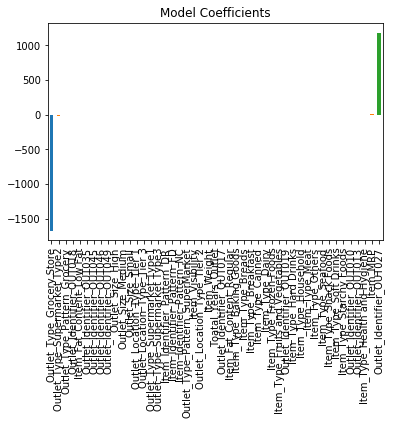

In [27]:
from sklearn.linear_model import Lasso
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = Lasso(alpha = 1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res4.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1127


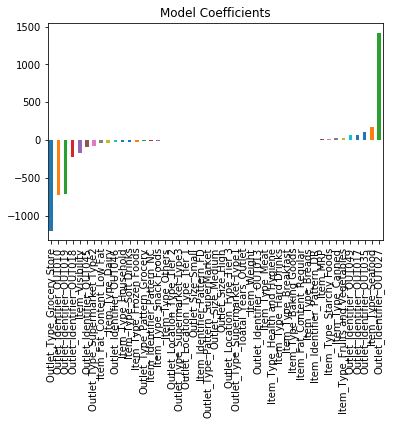

In [31]:
from sklearn.linear_model import ElasticNet
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = ElasticNet(alpha=0.01,l1_ratio=1,normalize=True)
modelfit(alg1, train, test, predictors, target, IDcol, 'res5.csv')
coef1 = pd.Series(alg1.coef_, predictors).sort_values()
coef1.plot(kind='bar', title='Model Coefficients')

In [32]:
from sklearn.neighbors import KNeighborsRegressor


In [41]:
from sklearn.neighbors import KNeighborsRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
for i in range(1,10):
    alg1 = KNeighborsRegressor(n_neighbors=i)
    modelfit(alg1, train, test, predictors, target, IDcol, 'res6.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 0

Model Report
RMSE : 780.1

Model Report
RMSE : 904.2

Model Report
RMSE : 972.1

Model Report
RMSE : 1016

Model Report
RMSE : 1045

Model Report
RMSE : 1069

Model Report
RMSE : 1085

Model Report
RMSE : 1101


In [ ]:
from sklearn.tree import DecisionTreeRegressor

In [44]:
from sklearn.tree import DecisionTreeRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)
modelfit(alg1, train, test, predictors, target, IDcol, 'res7.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1059


In [46]:
from sklearn.ensemble import RandomForestRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = RandomForestRegressor(n_estimators=200,max_depth=15, min_samples_leaf=100)
modelfit(alg1, train, test, predictors, target, IDcol, 'res8.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1062


In [48]:
from sklearn.ensemble import AdaBoostRegressor
predictors = [x for x in train.columns if x not in [target]+IDcol]
# print predictors
alg1 = AdaBoostRegressor(n_estimators=200)
modelfit(alg1, train, test, predictors, target, IDcol, 'res9.csv')
#coef1 = pd.Series(alg1.coef_, predictors).sort_values()
#coef1.plot(kind='bar', title='Model Coefficients')


Model Report
RMSE : 1410


In [49]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 100,200,300],
 'learning_rate' : [0.01,0.05,0.1,0.3,1],
 'loss' : ['linear', 'square', 'exponential']
 }

pre_gs_inst = RandomizedSearchCV(AdaBoostRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

pre_gs_inst.fit(train[predictors], train[target])

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=AdaBoostRegressor(base_estimator=None, learning_rate=1.0, loss='linear',
         n_estimators=50, random_state=None),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1], 'loss': ['linear', 'square', 'exponential']},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [50]:
pre_gs_inst.best_estimator_

AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='exponential',
         n_estimators=100, random_state=None)


Model Report
RMSE : 1105


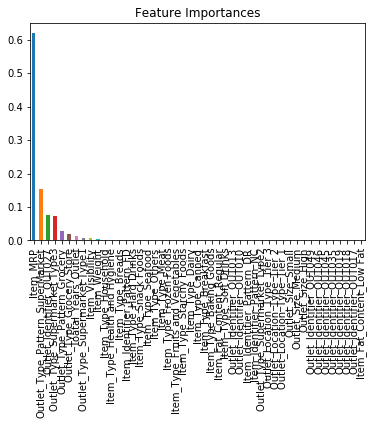

In [51]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
alg5 = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='exponential',
         n_estimators=100, random_state=None)
modelfit(alg5, train, test, predictors, target, IDcol, 'res10.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

In [52]:
coef5.index[:5]

Index(['Item_MRP', 'Outlet_Type_Pattern_SuperMarket',
       'Outlet_Identifier_OUT027', 'Outlet_Type_Supermarket Type3',
       'Outlet_Type_Pattern_Grocery'],
      dtype='object')


Model Report
RMSE : 1104


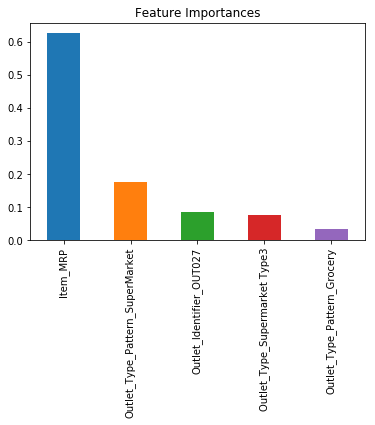

In [54]:
predictors=coef5.index[:7]
alg5 = AdaBoostRegressor(base_estimator=None, learning_rate=0.05, loss='exponential',
         n_estimators=100, random_state=None)
modelfit(alg5, train, test, predictors, target, IDcol, 'res10.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')


Model Report
RMSE : 932


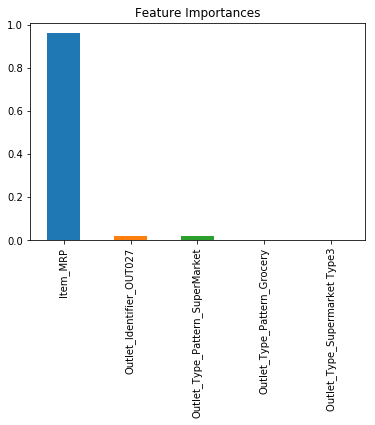

In [57]:
import xgboost as xgb
predictors = coef5.index[:7]
alg5 = xgb.XGBRegressor(max_depth=10, n_estimators=100, learning_rate=0.05)
modelfit(alg5, train, test, predictors, target, IDcol, 'res11.csv')
coef5 = pd.Series(alg5.feature_importances_, predictors).sort_values(ascending=False)
coef5.plot(kind='bar', title='Feature Importances')

In [61]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
 'n_estimators': [50, 100,200,300],
 'learning_rate' : [0.01,0.05,0.1,0.3,1]
 }

pre_gs_inst = RandomizedSearchCV(xgb.XGBRegressor(),
 param_distributions = param_dist,
 cv=3,
 n_iter = 10,
 n_jobs=-1)

pre_gs_inst.fit(train[predictors], train[target])

RandomizedSearchCV(cv=3, error_score='raise',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid=True, n_iter=10, n_jobs=-1,
          param_distributions={'n_estimators': [50, 100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1, 0.3, 1]},
          pre_dispatch='2*n_jobs', random_state=None, refit=True,
          return_train_score='warn', scoring=None, verbose=0)

In [62]:
pre_gs_inst.best_params_

{'n_estimators': 100, 'learning_rate': 0.05}

In [73]:
from sklearn import model_selection
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.naive_bayes import GaussianNB 
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from mlxtend.regressor import StackingRegressor
import numpy as np

clf1 = KNeighborsRegressor(n_neighbors=1)
clf2 = RandomForestRegressor(random_state=1)
clf3 = DecisionTreeRegressor()
lr = LinearRegression()
sclf = StackingRegressor(regressors=[clf1, clf2, clf3], 
                          meta_regressor=lr)

print('3-fold cross validation:\n')

for clf, label in zip([clf1, clf2, clf3, sclf], 
                      ['KNN', 
                       'Random Forest', 
                       'Decision Tree',
                       'Stacking Regressor']):

    scores = model_selection.cross_val_score(clf, train[predictors], train[target],
                                              cv=30)
    print("Accuracy: %0.2f (+/- %0.2f) [%s]" 
          % (scores.mean(), scores.std(), label))

3-fold cross validation:

Accuracy: 0.17 (+/- 0.11) [KNN]
Accuracy: 0.38 (+/- 0.08) [Random Forest]
Accuracy: 0.21 (+/- 0.11) [Decision Tree]
Accuracy: 0.21 (+/- 0.11) [Stacking Regressor]


In [76]:
from sklearn.model_selection import GridSearchCV
params = {}
grid = GridSearchCV(estimator=sclf, 
                    param_grid=params, 
                    cv=50,
                    refit=True)

In [77]:
predictors = [x for x in train.columns if x not in [target]+IDcol]
grid.fit(train[predictors], train[target])

for params, mean_score, scores in grid.grid_scores_:
        print("%0.3f +/- %0.2f %r"
              % (mean_score, scores.std() / 2.0, params))


0.357 +/- 0.06 {}


In [79]:
test[target] = grid.predict(test[predictors])
IDcol.append(target)
submission = pd.DataFrame({ x: test[x] for x in IDcol})
submission.to_csv("res_stack.csv", index=False)